<a href="https://colab.research.google.com/github/Klok1305/NNML/blob/dev/Lab_2_NNML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №2
ФИО: Безыкорнов Никита
Группа: БИВТ-20-4

In [18]:
import numpy as np
import math

Задача 1. Реализовать слой с функцией активации "сигмоида"


In [21]:
class SigmoidLayer():
    def __init__(self):
        self.X = []
        self.params = []
        self.output = None
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy
        self.output = 1 / (1 + np.exp(-X))
        return self.output


In [22]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
sigmoid = SigmoidLayer()
output = sigmoid.forward(X)
correct_answer = np.array([[0.57313782, 0.62961995, 0.54773438],
                           [0.51696857, 0.68718368, 0.65843628],
                           [0.65419284, 0.64005501, 0.50976449],
                           [0.58851107, 0.7202462 , 0.51500666],
                           [0.70350447, 0.70626044, 0.51279562]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(sigmoid, "params"), "Нет параметра params в реализованном классе"
assert hasattr(sigmoid, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(sigmoid, "X"), "Не сохранили X в реализованном классе"

Задача 2. Реализовать слой с активацией гиперболического тангенса

In [23]:
class TanhLayer():
    def __init__(self):
        self.X = []
        self.params = []
        self.output = None
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy
        self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
        return self.output

In [24]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
tanh = TanhLayer()
output = tanh.forward(X)
correct_answer = np.array([[0.28642281, 0.48582948, 0.18921297],
                           [0.0677962, 0.65669792, 0.57591821],
                           [0.5632092, 0.51946218, 0.03904306],
                           [0.34328675, 0.73782249, 0.05997262],
                           [0.69833441, 0.70505935, 0.05114899]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(tanh, "params"), "Нет параметра params в реализованном классе"
assert hasattr(tanh, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(tanh, "X"), "Не сохранили X в реализованном классе"


Задача 3. Реализовать функцию потерь MSE

In [25]:
class MSELoss():
    def forward(self, y_true, y_pred):
        self.output = (1 / len(y_true)) * sum((y_true - y_pred) ** 2)
        return self.output

In [26]:
np.random.seed(17)

y_true = np.random.randint(0, 1000, size=(100))
y_pred = np.random.randint(0, 1000, size=(100))
mse = MSELoss()
output = mse.forward(y_true, y_pred)
correct_answer = 157953.51
assert round(output) == round(correct_answer)


Задача 4. Реализовать каркас нейросети

In [27]:
class LinearLayer:
    """
    Линейный слой с семинаров, ничего менять не надо
    """

    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output


class NN:
    def __init__(self, loss_func):
        self.layers = []
        self.params = []
        self.grads = []
        self.loss_func = loss_func

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        self.output = X
        for layer in self.layers:
            self.output = layer.forward(self.output)
        return self.output

In [28]:
nn = NN(MSELoss())

assert hasattr(nn, "layers")
assert hasattr(nn, "params")
assert hasattr(nn, "grads")
assert hasattr(nn, "loss_func")
assert isinstance(nn.loss_func, MSELoss)

In [29]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
nn = NN(MSELoss())

linear1 = LinearLayer(3, 5)
nn.add_layer(linear1)

sigmoid1 = SigmoidLayer()
nn.add_layer(sigmoid1)

linear2 = LinearLayer(5, 1)
nn.add_layer(linear2)

sigmoid2 = SigmoidLayer()
nn.add_layer(sigmoid2)

output_nn = nn.forward(X)

assert round(output_nn.sum()) == 65

Задача 5. Соберите свою собственную нейросеть

In [30]:
np.random.seed(17)

nn = NN(MSELoss())

linears = [LinearLayer(4, 4), LinearLayer(4, 5), LinearLayer(5, 6), LinearLayer(6, 4), LinearLayer(4, 3),
           LinearLayer(3, 3)]

for layer in linears:
    nn.add_layer(layer)

In [31]:
np.random.seed(17)
X = np.random.randn(100, 4)
output = nn.forward(X)

assert output.shape == (100, 3)

layer_weights = []
for layer in nn.layers:
    if isinstance(layer, LinearLayer):
        layer_weights.append(layer.W.shape)
right_weights = [(4, 4), (4, 5), (5, 6), (6, 4), (4, 3), (3, 3)]
assert layer_weights == right_weights


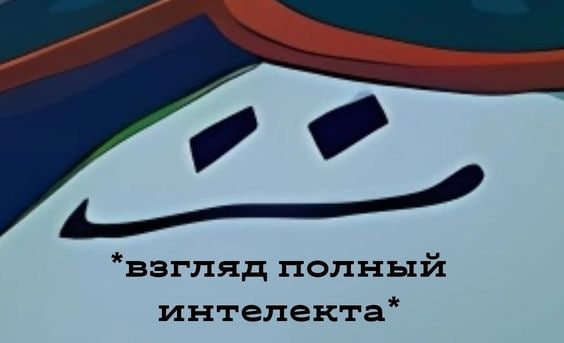